# Selection Efficiency Drawer

-   Draw event selection efficiency.


## Setup

### Import

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd

import matplotlib.pyplot as plt

from FigureSetting import set_nature_style, mm_to_inches, colors

### Figure Setting

In [2]:
set_nature_style()
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

figsize = (89 * mm_to_inches, 60 * mm_to_inches)
plt.rcParams['figure.figsize'] = figsize

figure_dir = "../figure/"
figure_name = "SelectionEfficiency.pdf"
figure_path = figure_dir + figure_name

### Configuration

In [3]:
crystals = [2, 3, 4, 6, 7]
crystal_colors = [plt.colormaps["Set1"](i) for i in range(len(crystals))]

## Read Data

### Read Selection Efficiency

In [4]:
efficiency_df = pd.read_csv("../data/SelectionEfficiency.csv")
efficiency_df.head()


,energy_kevee_2,efficiency_2,efficiency_upper_bound_2,efficiency_lower_bound_2,energy_kevee_3,efficiency_3,efficiency_upper_bound_3,efficiency_lower_bound_3,energy_kevee_4,efficiency_4,efficiency_upper_bound_4,efficiency_lower_bound_4,energy_kevee_6,efficiency_6,efficiency_upper_bound_6,efficiency_lower_bound_6,energy_kevee_7,efficiency_7,efficiency_upper_bound_7,efficiency_lower_bound_7
0,0.464826,0.063609,0.118707,0.008511,0.464489,0.058277,0.108641,0.007913,0.463141,0.053072,0.106071,0.000073,0.466072,0.036462,0.089925,0.000000,0.464289,0.040500,0.090358,0.000000
1,0.597634,0.218295,0.252504,0.184085,0.597200,0.207817,0.237896,0.177737,0.595467,0.179425,0.219929,0.138921,0.599235,0.176862,0.207994,0.145730,0.596943,0.159507,0.210007,0.109007
2,0.730441,0.413320,0.441102,0.385537,0.729911,0.404710,0.452161,0.357259,0.727793,0.343791,0.397233,0.290349,0.732398,0.389988,0.417731,0.362246,0.729596,0.337400,0.366642,0.308158
3,0.863249,0.570229,0.630400,0.510058,0.862622,0.583511,0.635774,0.531248,0.860119,0.509354,0.594144,0.424564,0.865561,0.582697,0.635629,0.529766,0.862250,0.522393,0.576677,0.468109
4,0.996056,0.700907,0.766797,0.635016,0.995333,0.716556,0.776172,0.656940,0.992445,0.644252,0.706611,0.581892,0.998725,0.730407,0.788782,0.672032,0.994904,0.668995,0.727805,0.610185


### Set DAMA QF

In [5]:
dama_qf = 0.3


### Read COSINE QF

In [6]:
cosine_qf_df = pd.read_csv("../data/CosineNaQF.csv")
cosine_qf_df["qf"] /= 100
cosine_qf_df["qf_err"] /= 100

cosine_qf_df.head()

,nuclear_recoil_energy,qf,qf_err
0,0.480180,0.086972,0.004827
1,0.670270,0.091398,0.004877
2,0.860360,0.094837,0.004942
3,1.050450,0.097680,0.005002
4,1.240541,0.100120,0.005054


## Draw Plot

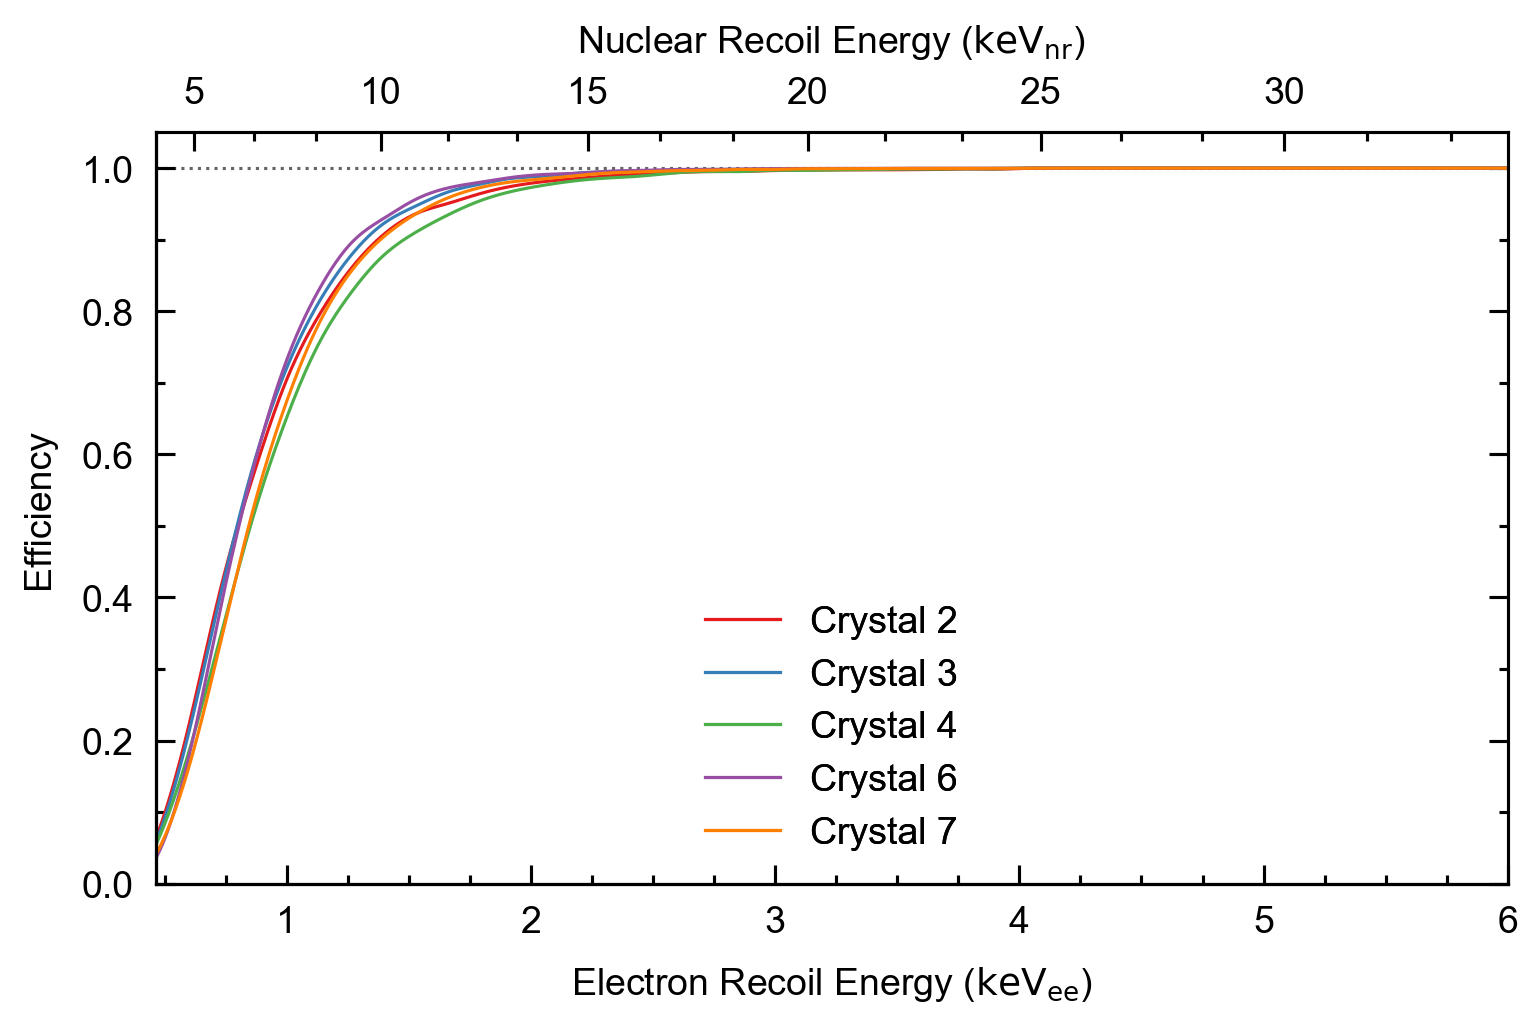

In [7]:
energy_nr_min = 5
energy_ee_min = energy_nr_min * np.interp(
    energy_nr_min, cosine_qf_df["nuclear_recoil_energy"], cosine_qf_df["qf"]
)  # keV_ee
energy_ee_max = 6

energy_ee_ticks = np.array([1, 2, 3, 4, 5, 6])
energy_ee_minor_ticks = np.arange(0.5, energy_ee_max + 1e-6, 0.25)
energy_ee_ticklabels = ["1", "2", "3", "4", "5", "6"]

energy_nr_dama_ee_ticks = np.array(
    [1.5, 3, 4.5, 6, 7.5, 9], dtype="float"
)  # keV_DAMA_ee
energy_nr_ticks = energy_nr_dama_ee_ticks / dama_qf  # keV_nr
energy_nr_ticks *= np.interp(
    energy_nr_ticks, cosine_qf_df["nuclear_recoil_energy"], cosine_qf_df["qf"]
)  # keV_ee
energy_nr_ticklabels = energy_nr_dama_ee_ticks / dama_qf
energy_nr_ticklabels = [f"{x:.2f}" for x in energy_nr_ticklabels]
energy_nr_ticklabels = [
    l if l[-3:] != ".00" else l[:-3] for l in energy_nr_ticklabels
]

energy_nr_dama_ee_minor_ticks = np.arange(1.5, 10.1, 0.5)  # keV_DAMA_ee
energy_nr_minor_ticks = energy_nr_dama_ee_minor_ticks / dama_qf  # keV_nr
energy_nr_minor_ticks *= np.interp(
    energy_nr_minor_ticks,
    cosine_qf_df["nuclear_recoil_energy"],
    cosine_qf_df["qf"],
)  # keV_ee

efficiency_ticks = np.arange(0, 1.01, 0.2)
efficiency_minor_ticks = np.arange(0, 1.01, 0.1)

fig, ax_ee = plt.subplots(1, 1)

lowest_threshold = efficiency_df[f"energy_kevee_{crystals[0]:d}"].min()
cosine_draws = list()
for crystal, color in zip(crystals, crystal_colors):
    x = efficiency_df[f"energy_kevee_{crystal:d}"].values
    y = efficiency_df[f"efficiency_{crystal:d}"].values

    dx = x[1] - x[0]
    x = np.concatenate([[x[0] - dx], x, [x[-1] + dx]])
    y = np.concatenate([[0], y, [1]])

    fine_x = np.linspace(0, energy_ee_max, 1000)
    spline = CubicSpline(x, y, bc_type="clamped")
    fine_y = spline(fine_x)
    fine_y[fine_x < x.min()] = 0
    fine_y[fine_x > x.max()] = 1

    assert np.all(fine_y >= 0) and np.all(fine_y <= 1)

    threshold = efficiency_df[f"energy_kevee_{crystal:d}"].min()
    lowest_threshold = min(lowest_threshold, threshold)
    draw_mask = fine_x > threshold

    label = f"Crystal {crystal:d}"
    line = ax_ee.plot(fine_x[draw_mask], fine_y[draw_mask], color=color, label=label)
    cosine_draws.append(line[0])

# style
ax_ee.axhline(1, color=colors["IbsGrey"], linestyle="dotted", zorder=-10)

ax_ee.set_xlim(lowest_threshold, energy_ee_max)
ax_ee.set_xticks(energy_ee_ticks)
ax_ee.set_xticklabels(energy_ee_ticklabels)
ax_ee.set_xticks(energy_ee_minor_ticks, minor=True)
ax_ee.set_ylim(0, 1.05)
ax_ee.set_xlabel("Electron Recoil Energy (" + r"$\mathrm{keV_{ee}}$" + ")")

ax_ee.set_ylabel("Efficiency")
ax_ee.set_yticks(efficiency_ticks)
ax_ee.set_yticks(efficiency_minor_ticks, minor=True)

ax_nr = ax_ee.twiny()
ax_nr.set_xlabel("Nuclear Recoil Energy (" + r"$\mathrm{keV_{nr}}$" + ")")
ax_nr.set_xlim(lowest_threshold, energy_ee_max)
ax_nr.set_xticks(energy_nr_ticks)
ax_nr.set_xticklabels(energy_nr_ticklabels)
ax_nr.set_xticks(energy_nr_minor_ticks, minor=True)

ax_ee.spines["right"].set_visible(True)
ax_nr.spines["top"].set_visible(True)
ax_ee.tick_params(axis="y", right=True, direction="in", which="both")

cosine_legend = ax_ee.legend(handles=cosine_draws, loc="lower center", frameon=False, ncol=1)
ax_ee.add_artist(cosine_legend)

plt.tight_layout()
plt.savefig(figure_path)
plt.show()

## END-OF-NOTE